<a href="https://colab.research.google.com/github/johanaluna/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/JohanaLS_DS7_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import numpy as np


In [0]:

url='https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
df = pd.read_csv(url, 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

In [227]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [15]:
print(df.shape) #check size of my data

(435, 17)


In [16]:
   df.isnull().sum(axis = 0) #axis =0 means by columns 

party                   0
handicapped-infants     0
water-project           0
budget                  0
physician-fee-freeze    0
el-salvador-aid         0
religious-groups        0
anti-satellite-ban      0
aid-to-contras          0
mx-missile              0
immigration             0
synfuels                0
education               0
right-to-sue            0
crime                   0
duty-free               0
south-africa            0
dtype: int64

In [17]:
df.dtypes

party                   object
handicapped-infants     object
water-project           object
budget                  object
physician-fee-freeze    object
el-salvador-aid         object
religious-groups        object
anti-satellite-ban      object
aid-to-contras          object
mx-missile              object
immigration             object
synfuels                object
education               object
right-to-sue            object
crime                   object
duty-free               object
south-africa            object
dtype: object

In [228]:
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [19]:
df.isnull().sum(axis = 0) #Axis=0 means in the columns

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [20]:
republican = df[df.party == "republican"]#split data by party
print(republican.shape)
republican.head()

(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [233]:
democrat = df[df.party == "democrat"]
print(democrat.shape)
democrat.head()

(267, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [22]:
df.party.value_counts() #Count the different parties in the data and check with my split data

democrat      267
republican    168
Name: party, dtype: int64

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

# 1 Sample T-test


In [232]:
# ******JUST FOR IMMIGRATION 
# Null Hypothesis: There is 0 support for this bill among Republicans in the House
# Alternative: There is non-0 support (some support) for this bill

print('Null hypothesis is there is 0 support for the immigration project.\n')
ttest_immi= ttest_1samp(republican['immigration'], 0, nan_policy='omit') # zero because "no" anwers was changed to value zero thne if the population mean is zero means that nobody supported that project
print('Conclusion: ')
print('Due to a t-statistic of',ttest_immi[0], 'and a p-value of', ttest_immi[1]) #Remember ### the smaller my p-value the bigger my t-test will be
if ttest_immi[1] < 0.05: #Evaluate that my p-value is smaller that my alpha. If is smaller then my population is different. 
  print('\nWe reject the null hypothesis. This suggests that there is some support for the immigration project')
else:
  print('\nThe null hypothesis is correct. There is no support for the immigration project')


Null hypothesis is there is 0 support for the immigration project.

Conclusion: 
Due to a t-statistic of 14.376541013291384 and a p-value of 7.541248569126767e-31

We reject the null hypothesis. This suggests that there is some support for the immigration project


In [99]:
# Null Hypothesis: Republican support is evenly divided
# Alternative: Republican support is  not evenly divided
print('Null hypothesis: the Republican support is evenly divided.\n')
ttest_immi_rep= ttest_1samp(republican['immigration'], 0.5, nan_policy='omit') ## population mean =0.5 that the votes were equal for yes and no .
print('Conclusion: ')
print('Due to a t-statistic of',ttest_immi_rep[0], 'and a p-value of', ttest_immi_rep[1])
if ttest_immi_rep[1] < 0.5:
  print('\nWe reject the null hypothesis for the immigration project. The ssupport is not evenly divided')
else:
  print('\nThe null hypothesis is correct, the Republican support is evenly divided')

Null hypothesis: the Republican support is evenly divided.

Conclusion: 
Due to a t-statistic of 1.4845341263724807 and a p-value of 0.1395867786115413

We reject the null hypothesis for the immigration project. The ssupport is not evenly divided


# 1 Sample T-test
*Now I created a function to test all the data *

In [0]:
# Null Hypothesis: There is 0 support for this bill among Republicans in the House
# Alternative: There is non-0 support (some support) for this bill

namescolumns=['handicapped-infants','water-project','budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

def rep_zero_sup(n):
  print('Alpha =',n)
  print('*** REPUBLICANS ZERO SUPPORT *** ')                          
  for x in namescolumns:
    print('\nANALIZING..... ',x)
    print(' Null hypothesis: 0 support for the',x, 'project.')
    ttest_data= ttest_1samp(republican[x], 0, nan_policy='omit')
    print('   t-statistic:',ttest_data[0], '  p-value:', ttest_data[1])
    if ttest_data[1] < alpha_value:
      print(' We reject the null hypothesis. This suggest that there is some support for the',x,'project')
      print('----------------')
    else:
      print('The null hypothesis is correct. There is no support for the',x ,'project')
      print('----------------')

def rep_eq_support(n):
  print('Alpha =',n)
  print('*** REPUBLICANS EQUAL SUPPORT *** ') 
  for x in namescolumns:
    print('\nANALIZING..... ',x)
    print('Null hypothesis: the Republican support is evenly divided.')
    ttest_immi_alt= ttest_1samp(republican[x], 0.5, nan_policy='omit') #if pvalue is less than 0.05 then calculate for my second alternative
    print('   t-statistic:',ttest_immi_rep[0], ' p-value:', ttest_immi_rep[1])
    if ttest_immi_alt[1] < alpha_value:
      print('   We reject the null hypothesis for the',x,'project. The ssupport is not evenly divided')
      print('----------------')
    else:
      print('The null hypothesis is correct, the Republican support is evenly divided')
      print('----------------')




In [0]:
def dem_zero_sup(n):
  print('Alpha =',n)
  print('*** DEMOCRATS ZERO SUPPORT *** ')                          
  for x in namescolumns:
    print('\nANALIZING..... ',x)
    print(' Null hypothesis: 0 support for the',x, 'project.')
    ttest_data= ttest_1samp(democrat[x], 0, nan_policy='omit')
    print('   t-statistic:',ttest_data[0], '  p-value:', ttest_data[1])
    if ttest_data[1] < alpha_value:
      print(' We reject the null hypothesis. This suggest that there is some support for the',x,'project')
      print('----------------')
    else:
      print('The null hypothesis is correct. There is no support for the',x ,'project')
      print('----------------')

def dem_eq_support(n):
  print('Alpha =',n)
  print('*** DEMOCRATS EQUAL SUPPORT *** ') 
  for x in namescolumns:
    print('\nANALIZING..... ',x)
    print('Null hypothesis: the Republican support is evenly divided.')
    ttest_immi_alt= ttest_1samp(democrat[x], 0.5, nan_policy='omit') #if pvalue is less than 0.05 then calculate for my second alternative
    print('   t-statistic:',ttest_immi_rep[0], ' p-value:', ttest_immi_rep[1])
    if ttest_immi_alt[1] < alpha_value:
      print('   We reject the null hypothesis for the',x,'project. The ssupport is not evenly divided')
      print('----------------')
    else:
      print('The null hypothesis is correct, the Democrats support is evenly divided')
      print('----------------')

alpha_value=0.05

In [272]:
rep_zero_sup(alpha_value)

Alpha = 0.01
*** REPUBLICANS ZERO SUPPORT *** 

ANALIZING.....  handicapped-infants
 Null hypothesis: 0 support for the handicapped-infants project.
   t-statistic: 6.159569669016066   p-value: 5.434587970316366e-09
 We reject the null hypothesis. This suggest that there is some support for the handicapped-infants project
----------------

ANALIZING.....  water-project
 Null hypothesis: 0 support for the water-project project.
   t-statistic: 12.28932045559371   p-value: 2.525482675130834e-24
 We reject the null hypothesis. This suggest that there is some support for the water-project project
----------------

ANALIZING.....  budget
 Null hypothesis: 0 support for the budget project.
   t-statistic: 5.02528816355446   p-value: 1.3107521045196396e-06
 We reject the null hypothesis. This suggest that there is some support for the budget project
----------------

ANALIZING.....  physician-fee-freeze
 Null hypothesis: 0 support for the physician-fee-freeze project.
   t-statistic: 115.6114

In [273]:
rep_eq_support(alpha_value)

Alpha = 0.01
*** REPUBLICANS EQUAL SUPPORT *** 

ANALIZING.....  handicapped-infants
Null hypothesis: the Republican support is evenly divided.
   t-statistic: 3.9975252761343896  p-value: 0.00010154897627277522
   We reject the null hypothesis for the handicapped-infants project. The ssupport is not evenly divided
----------------

ANALIZING.....  water-project
Null hypothesis: the Republican support is evenly divided.
   t-statistic: 3.9975252761343896  p-value: 0.00010154897627277522
The null hypothesis is correct, the Republican support is evenly divided
----------------

ANALIZING.....  budget
Null hypothesis: the Republican support is evenly divided.
   t-statistic: 3.9975252761343896  p-value: 0.00010154897627277522
   We reject the null hypothesis for the budget project. The ssupport is not evenly divided
----------------

ANALIZING.....  physician-fee-freeze
Null hypothesis: the Republican support is evenly divided.
   t-statistic: 3.9975252761343896  p-value: 0.00010154897627

In [274]:
dem_zero_sup(alpha_value)

Alpha = 0.01
*** DEMOCRATS ZERO SUPPORT *** 

ANALIZING.....  handicapped-infants
 Null hypothesis: 0 support for the handicapped-infants project.
   t-statistic: 19.825711173357988   p-value: 1.0391992873567661e-53
 We reject the null hypothesis. This suggest that there is some support for the handicapped-infants project
----------------

ANALIZING.....  water-project
 Null hypothesis: 0 support for the water-project project.
   t-statistic: 15.49193338482967   p-value: 6.633846650320544e-38
 We reject the null hypothesis. This suggest that there is some support for the water-project project
----------------

ANALIZING.....  budget
 Null hypothesis: 0 support for the budget project.
   t-statistic: 45.42101898369565   p-value: 2.3005685556379574e-125
 We reject the null hypothesis. This suggest that there is some support for the budget project
----------------

ANALIZING.....  physician-fee-freeze
 Null hypothesis: 0 support for the physician-fee-freeze project.
   t-statistic: 3.8396

In [275]:
dem_eq_support(alpha_value)

Alpha = 0.01
*** DEMOCRATS EQUAL SUPPORT *** 

ANALIZING.....  handicapped-infants
Null hypothesis: the Republican support is evenly divided.
   t-statistic: 3.9975252761343896  p-value: 0.00010154897627277522
   We reject the null hypothesis for the handicapped-infants project. The ssupport is not evenly divided
----------------

ANALIZING.....  water-project
Null hypothesis: the Republican support is evenly divided.
   t-statistic: 3.9975252761343896  p-value: 0.00010154897627277522
The null hypothesis is correct, the Democrats support is evenly divided
----------------

ANALIZING.....  budget
Null hypothesis: the Republican support is evenly divided.
   t-statistic: 3.9975252761343896  p-value: 0.00010154897627277522
   We reject the null hypothesis for the budget project. The ssupport is not evenly divided
----------------

ANALIZING.....  physician-fee-freeze
Null hypothesis: the Republican support is evenly divided.
   t-statistic: 3.9975252761343896  p-value: 0.00010154897627277

# 2 Sample Test


1. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
2. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
3. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

In [271]:
namescolumns=['handicapped-infants','water-project','budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
#define my function that analize all my data
def two_dample_test(n,m):
  for x in namescolumns: #for each column
    print('\nANALIZING..... ',x)
 # print(' Null hypothesis: 0 support for the',x, 'project.')

    ttest_2= ttest_ind(republican[x], democrat[x], nan_policy='omit') #calculate my ttest
    #Print the mean of each party in a certain column
    print(' Mean Republicans:',republican[x].mean()) 
    print(' Mean Democrats:  ',democrat[x].mean())
    print(' T-statistic:',ttest_2[0],  '    P-value:', ttest_2[1]) #print the data that is my variable ttest_2 that has my t-test results

    #according to my assignament my alpha value for the points 1 and 2 is 0.01 , that was saved in the variable alpha_value=n
    if ttest_2[1] < n:
      print('   We reject the null hypothesis. My data is not similar. P_value',ttest_2[1],'<',n) #If my p_value is smaller than my alpha means that my data is not similar for that reason I reject my Null hypothesis
      
      if republican[x].mean()>democrat[x].mean(): #As my samples are not similar then with the mean I can chechk who support more a project because the 'YES' votes were changed by ones values
        print('Republicans support more the project:',x)
      else:
        print('Democrats support more the project:',x)
    else : #for all those samples in which my p_value not < than alpha) test the second condition of my assignment that says my alpha is 0.1
      if ttest_2[1] > m:
        print('My data is similar and my P_value is bigger than',m)
        print('!!!!!!!!')

alpha_value=0.01
alpha_no_dif=0.1
two_dample_test(alpha_value,alpha_no_dif)


ANALIZING.....  handicapped-infants
 Mean Republicans: 0.18787878787878787
 Mean Democrats:   0.6046511627906976
 T-statistic: -9.205264294809222     P-value: 1.613440327937243e-18
   We reject the null hypothesis. My data is not similar. P_value 1.613440327937243e-18 < 0.01
Democrats support more the project: handicapped-infants

ANALIZING.....  water-project
 Mean Republicans: 0.5067567567567568
 Mean Democrats:   0.502092050209205
 T-statistic: 0.08896538137868286     P-value: 0.9291556823993485
My data is similar and my P_value is bigger than 0.1
!!!!!!!!

ANALIZING.....  budget
 Mean Republicans: 0.13414634146341464
 Mean Democrats:   0.8884615384615384
 T-statistic: -23.21277691701378     P-value: 2.0703402795404463e-77
   We reject the null hypothesis. My data is not similar. P_value 2.0703402795404463e-77 < 0.01
Democrats support more the project: budget

ANALIZING.....  physician-fee-freeze
 Mean Republicans: 0.9878787878787879
 Mean Democrats:   0.05405405405405406
 T-statis

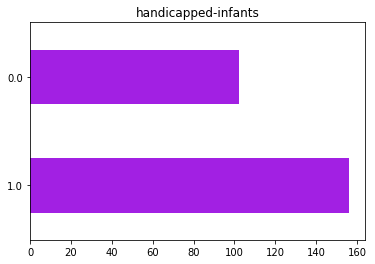

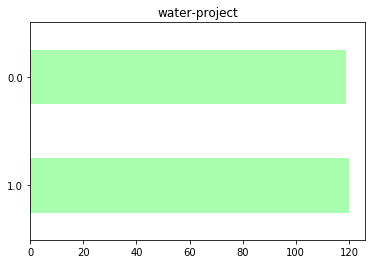

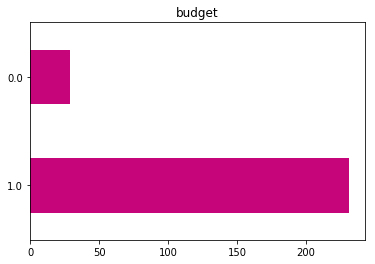

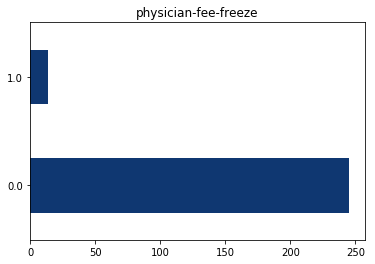

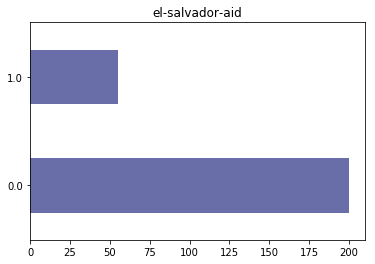

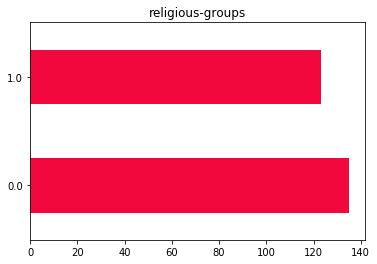

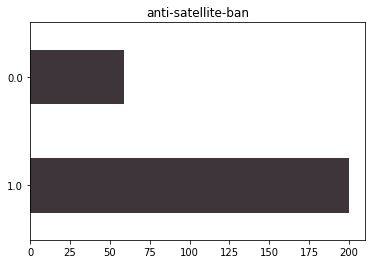

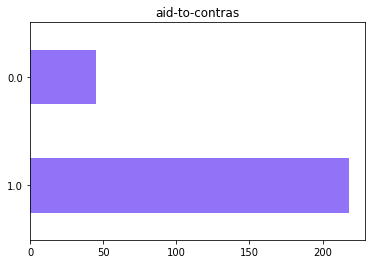

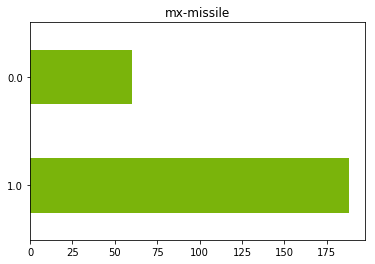

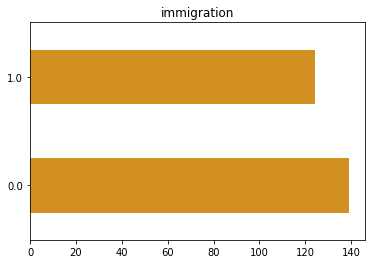

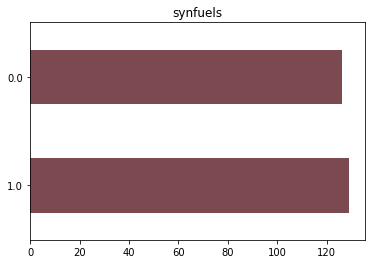

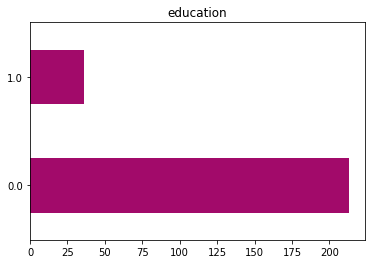

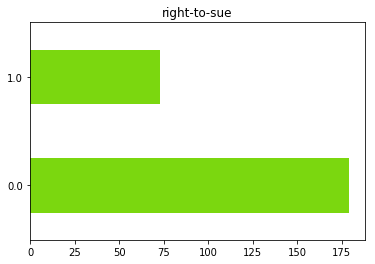

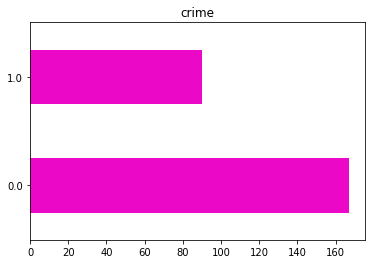

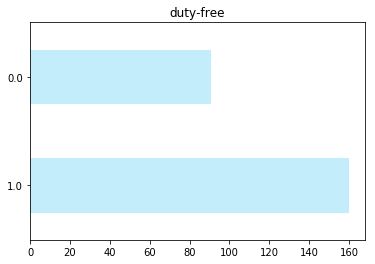

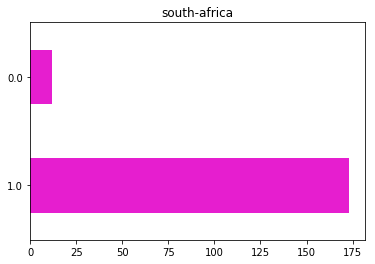

In [363]:

for i in namescolumns:
  ax = plt.gca()
  data=democrat[i].value_counts()
  data.plot(kind='barh',figsize=(3,3), color=np.random.rand(3,),  ax=ax,subplots=True,)
  plt.show();
